<a href="https://colab.research.google.com/github/rmDL4SON/Git_Practice/blob/main/NN_Pretrained_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [95]:
import numpy as np
import tensorflow as tf
import keras
# from tensorflow import keras
# from tensorflow.keras import layers
# from tensorflow.keras.models import Sequential, load_model

from keras_preprocessing.image import img_to_array, load_img # convert image to array.
from keras.applications.inception_resnet_v2 import InceptionResNetV2, decode_predictions, preprocess_input

from IPython.core.display import display

from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input as preprocess_input_vgg19
from keras.applications.vgg19 import decode_predictions as decode_vgg19

# Constants

In [98]:
FILE_1 = '01 Umbrella.jpg'
FILE_2 = '02 Couple.jpg'
FILE_3 = '03 Ocean.jpg'
FILE_4 = '04 Horse.jpg'
FILE_5 = '05 City.jpg'
FILE_6 = '06 Feet.jpg'

# Pre-processing Images

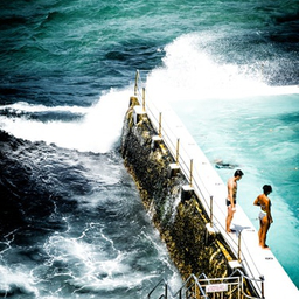

In [46]:
pic = load_img(FILE_3,  target_size=(299, 299))
display(pic)

In [31]:
pic_array = img_to_array(pic)
pic_array.shape

(299, 299, 3)

In [32]:
expanded = np.expand_dims(pic_array, axis = 0)
expanded.shape

(1, 299, 299, 3)

In [37]:
preprocessed = preprocess_input(expanded)

Create a function called format_img_inceptionrestnet() that takes a filename as argument. The function needs to load the image in the default resolution for inceptionResNetv2, conver the image to an array and return the preprocesssed image for the inceptionResNetv2 model

In [76]:
def format_img_inceptionrestnetv2(filename):
  pic_array = img_to_array(load_img(filename,  target_size=(299, 299)))
  expanded = np.expand_dims(pic_array, axis = 0)
  preprocessed = preprocess_input(expanded)
  print(f'input file is:', {filename})
  return preprocessed


#Load InceptionResNet

In [77]:
%%time

inception_model = InceptionResNetV2(weights = 'imagenet')

CPU times: user 5.98 s, sys: 225 ms, total: 6.21 s
Wall time: 5.89 s


In [78]:
# inception_model.graph = tf.get_default_graph()
inception_model.graph = tf.compat.v1.get_default_graph()

# Making Predictions

In [69]:
#print(format_img_inceptionrestnetv2(FILE_3))

input file is: {'06 Feet.jpg'}


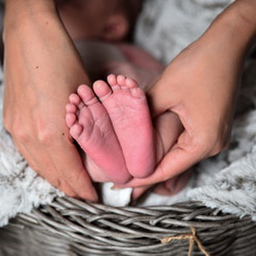

The prediction is:


[[('n03188531', 'diaper', 0.09648722),
  ('n03482405', 'hamper', 0.07116323),
  ('n02808304', 'bath_towel', 0.055679902),
  ('n04336792', 'stretcher', 0.053134687),
  ('n02808440', 'bathtub', 0.045097556)]]

In [100]:
data = format_img_inceptionrestnetv2(FILE_6)
display(load_img(FILE_6))
print('The prediction is:')
prediction = inception_model.predict(data)
decode_predictions(prediction)

# Testing the VGG19 Model

In [91]:
def format_img_vgg19(filename):
  pic_array = img_to_array(load_img(filename,  target_size=(224, 224)))
  expanded = np.expand_dims(pic_array, axis = 0)
  preprocessed_vgg19 = preprocess_input_vgg19(expanded)
  print(f'input file is:', {filename})
  return preprocessed_vgg19

input file is: {'06 Feet.jpg'}


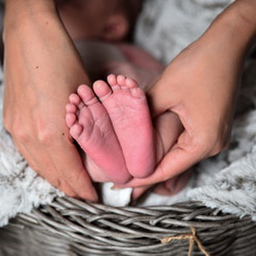

The prediction is:


[[('n07880968', 'burrito', 0.35974768),
  ('n01817953', 'African_grey', 0.09527811),
  ('n03992509', "potter's_wheel", 0.047266208),
  ('n07860988', 'dough', 0.037686206),
  ('n01748264', 'Indian_cobra', 0.026607495)]]

In [99]:
data2 = format_img_vgg19(FILE_6)
display(load_img(FILE_6))
print('The prediction is:')
vgg19_model = VGG19()

prediction_vgg19 = vgg19_model.predict(data2)
decode_vgg19(prediction_vgg19)